<a href="https://colab.research.google.com/github/venuvardhan22/OIBSIP/blob/main/Level%201%20-%20Project%201/Retails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('retail_sales_dataset.csv')
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
year = []
month = []
day = []
for i in data['Date']:
  a = i.split('-')
  year.append(a[0])
  month.append(a[1])
  day.append(a[2])
data['year'] = pd.Series(year)
data['month'] = pd.Series(month)
data['day'] = pd.Series(day)

In [ ]:
data = data.drop('Date',axis=1)

In [ ]:
data

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,month,day
0,1,CUST001,Male,34,Beauty,3,50,150,2023,11,24
1,2,CUST002,Female,26,Clothing,2,500,1000,2023,02,27
2,3,CUST003,Male,50,Electronics,1,30,30,2023,01,13
3,4,CUST004,Male,37,Clothing,1,500,500,2023,05,21
4,5,CUST005,Male,30,Beauty,2,50,100,2023,05,06
...,...,...,...,...,...,...,...,...,...,...,...
995,996,CUST996,Male,62,Clothing,1,50,50,2023,05,16
996,997,CUST997,Male,52,Beauty,3,30,90,2023,11,17
997,998,CUST998,Female,23,Beauty,4,25,100,2023,10,29
998,999,CUST999,Female,36,Electronics,3,50,150,2023,12,05


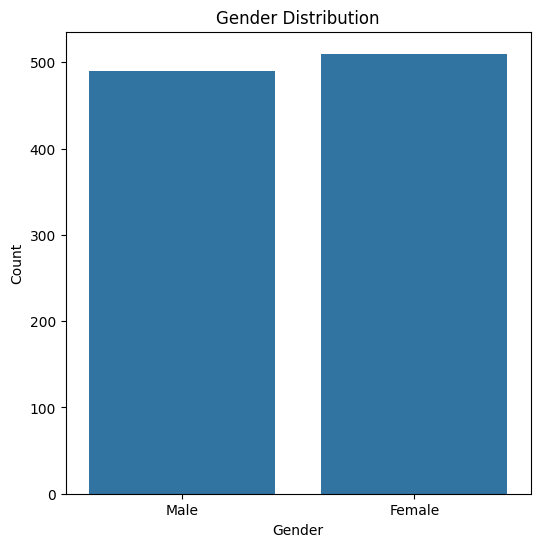

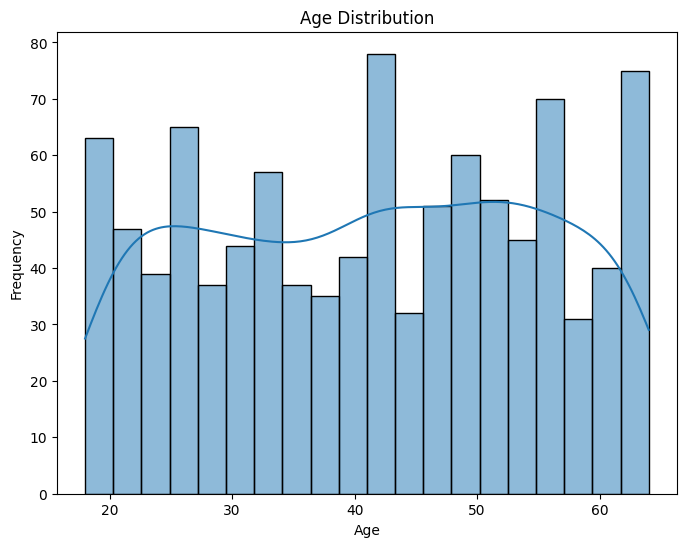

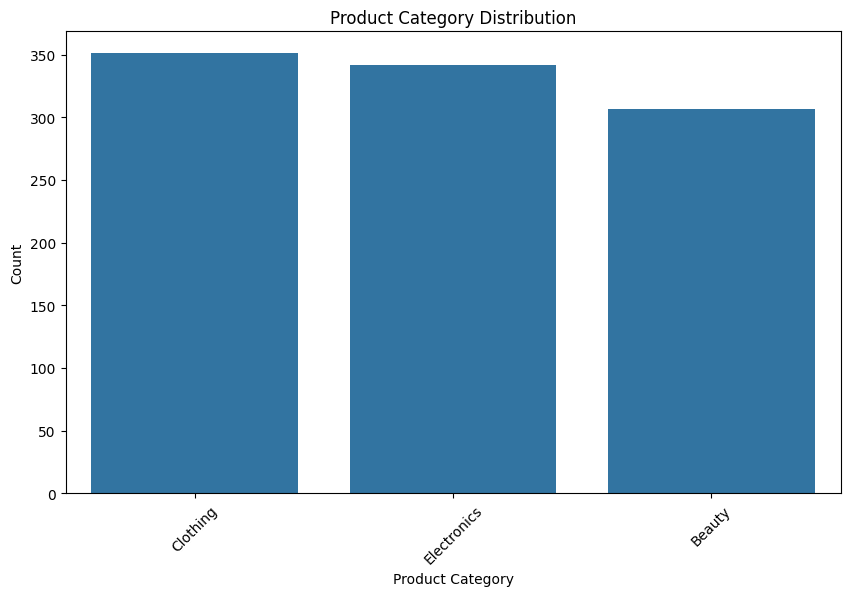

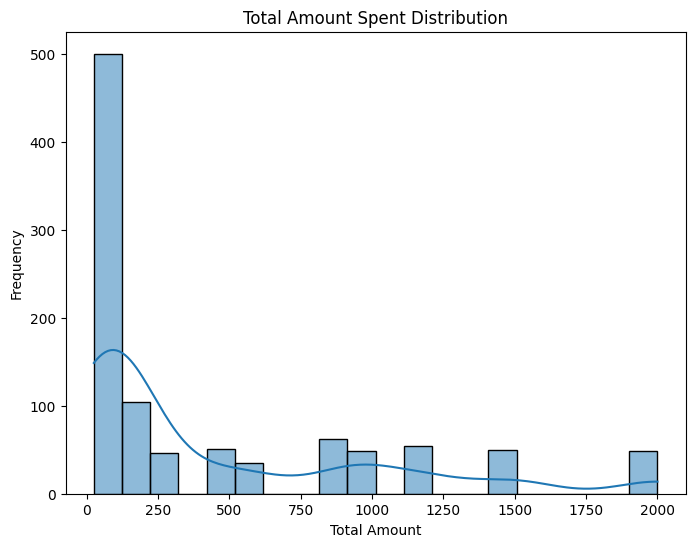

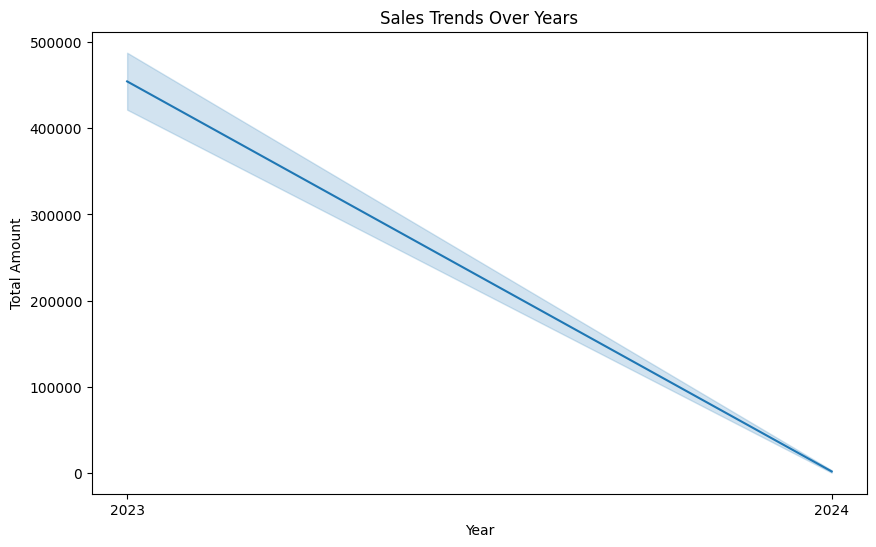

<ipython-input-39-fec8e08d3517>:47: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


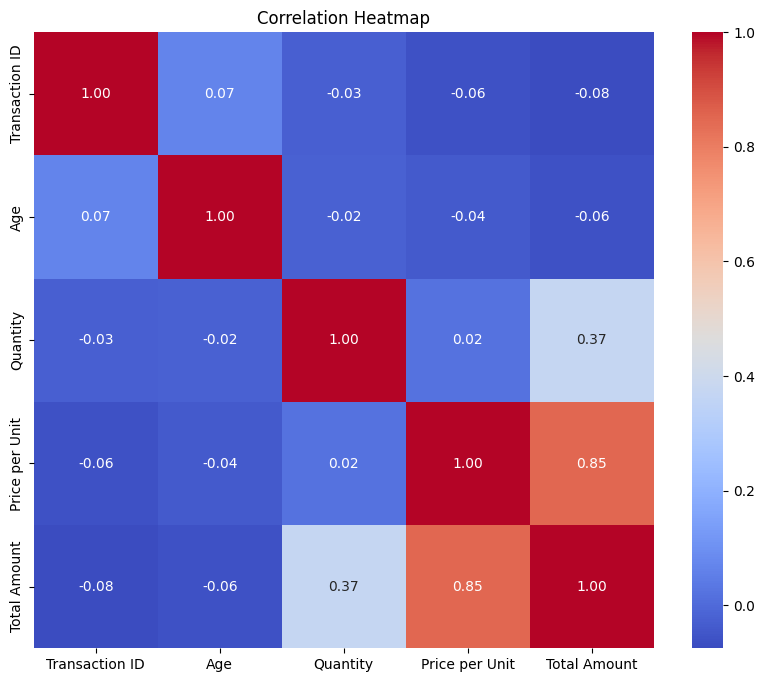

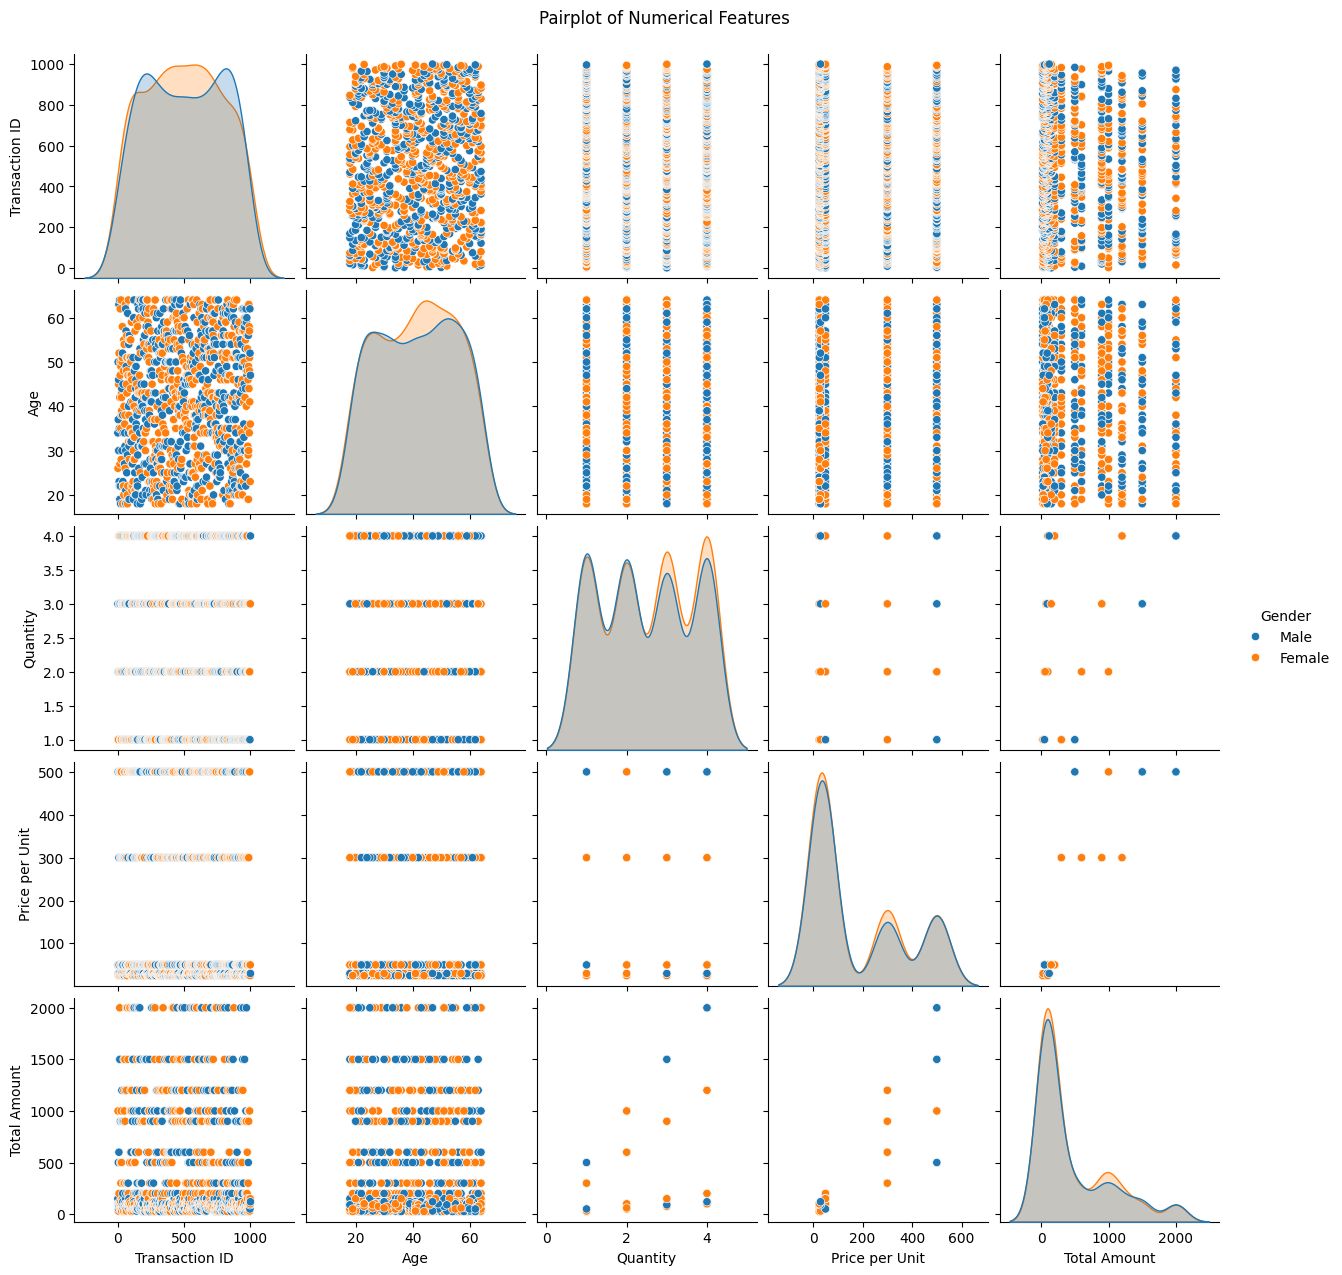

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Product Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Product Category', data=data, order=data['Product Category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Total Amount Spent Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Total Amount'], bins=20, kde=True)
plt.title('Total Amount Spent Distribution')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

# Sales Trends Over Time (Yearly)
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Total Amount', data=data, estimator=sum)
plt.title('Sales Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot
sns.pairplot(data, hue='Gender', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()
